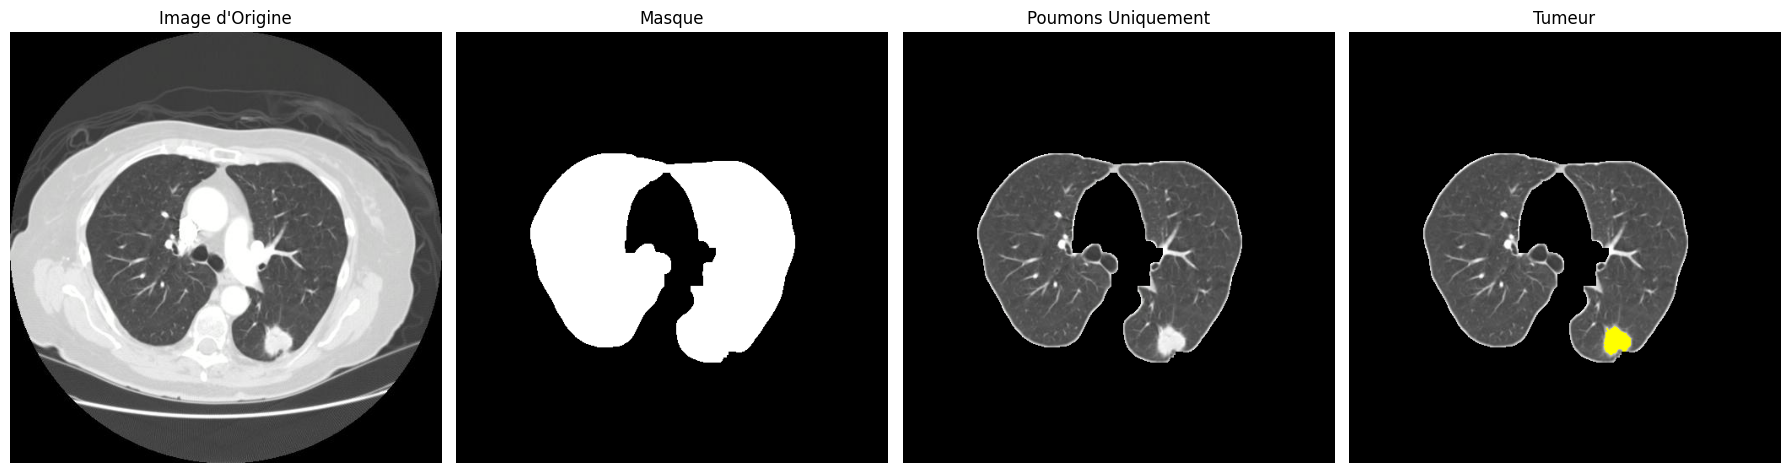

"for i, contour in enumerate(contours):\n  contour_img = np.zeros_like(img)\n  cv2.drawContours(contour_img, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)\n  contour_result = cv2.bitwise_and(img, contour_img)\n  plt.figure(figsize=(6, 6))\n  plt.imshow(contour_result)\n  plt.title(f'Contour {i+1}')\n  plt.axis('off')\n  plt.show()\n\nplt.show()"

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread("/content/CT001.jpg")


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


thresh = cv2.bitwise_not(thresh)

kernel = np.ones((5, 5), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=3)
thresh = cv2.erode(thresh, kernel, iterations=2)


mask = np.zeros_like(thresh)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mask, [contours[0]], -1, 255, thickness=cv2.FILLED)




result = cv2.bitwise_and(img, img, mask=mask)

result1 = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

_, thresh = cv2.threshold(result1, 200, 255, cv2.THRESH_BINARY)

mask1 = np.zeros_like(thresh)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(mask1, [contours[10]], -1, 255, thickness=cv2.FILLED)

yellow_color = (0, 255, 255)


result_rgb = cv2.cvtColor(result1, cv2.COLOR_GRAY2BGR)


for y in range(mask1.shape[0]):
    for x in range(mask1.shape[1]):
        if mask1[y, x] == 255:
            result_rgb[y, x] = yellow_color


plt.figure(figsize=(18, 6))


plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image d\'Origine')
plt.axis('off')


plt.subplot(142)
plt.imshow(mask, cmap='gray')
plt.title('Masque')
plt.axis('off')


plt.subplot(143)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Poumons Uniquement')
plt.axis('off')


plt.subplot(144)
plt.imshow(cv2.cvtColor(result_rgb, cv2.COLOR_BGR2RGB))
plt.title('Tumeur')
plt.axis('off')

plt.tight_layout()
plt.show()



"""for i, contour in enumerate(contours):
  contour_img = np.zeros_like(img)
  cv2.drawContours(contour_img, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
  contour_result = cv2.bitwise_and(img, contour_img)
  plt.figure(figsize=(6, 6))
  plt.imshow(contour_result)
  plt.title(f'Contour {i+1}')
  plt.axis('off')
  plt.show()

plt.show()"""


